<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M3_AST_16_Classical_Feature___Deep_Feature_Extraction_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 16 : Classical Feature and Deep Feature Extraction

## Learning Objectives

   
  At the end of the experiment, you will be able to :
    
  * understand about extracting classical features using HOG
  * understand about extracting deep features from pretrained model
  * compare the accuracies of both the features applied on SVM
 

### Dataset Description

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

* It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

* It is a widely used and deeply understood dataset and, for the most part, is “solved.” 





### Problem Statement

In this MNIST dataset, there are 70,000 images of handwritten single digits. Here, the task is to create a model that classify the images into the respective handwritten digits using **Classical Features (Generating HOG Features from Images)** and **Deep Features (Using Pretrained MLP model)**.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M3_AST_16_Classical_Feature_&_Deep_Feature_Extraction_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/pretrained_layer4_512n.pt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the libraries

In [4]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from tensorflow.keras.datasets import mnist
import seaborn as sns
import copy
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from sklearn.datasets import load_digits
from collections import Counter

#### Loading and Splitting the data

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Normalizing the data

Scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data so as to avoid large gradient values that could make training difficult. 



In [6]:
X_train = X_train.astype('float32') / 255
# X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255


### Feature Representation using HOG (Histogram of Oriented Gradients) Method

The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The idea behind HOG is to extract features into a vector, and feed it into a classification algorithm that will assess whether a face (or any object you train it to recognize actually) is present in a region or not.

Feature extraction is the process by which certain features of interest within an image are detected and represented for further processing. The resulting representation can be subsequently used as an input to the classification techniques, which will then classify, or recognize the semantic contents of the image or its objects. 


To identify the objects using HOG method requires the following steps to be followed :-


**What is Gradient Image?**

<img src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/Gradient.png" alt="Drawing" height="200" width="460"/>

We start with computing the horizontal and vertical gradients of the image. In the image when we move from left to right pixel by pixel, there might be a change in the pixel value i.e, from a black lower pixel number to a white higher pixel number. Going from left to right gives us the horizontal gradient and going from top to down gives a vertical gradient. This sudden change in the color is called a gradient. 

The gradient image removes a lot of non-essential information (e.g. constant colored background), but highlighted outlines and still we can identify the image. At every pixel, the gradient has a magnitude and a direction.

**Orientation of Gradients**

HOG works with a block which is similar to a sliding window. A block is considered as a pixel grid in which gradients are constituted from the magnitude and direction of change in the intensities of the pixel within the block.

We first calculate the gradients by taking a block from the images. For the selected block, determine the gradient (or change) in the x-direction and aslo calculate the gradient in the y-direction. Once we get the gradients, we will also calculate the gradient magnitude and gradient angle for each pixel (in the image).

**Histogram of Gradients**
    
The next step is to create a histogram of gradients for the block of pixels from the image. We will take each pixel value, find the angle/orientation of the pixel and update the frequency table. The same process is repeated for all the pixel values and we end up with a frequency table that denotes angles and the occurrence of these angles in the image. This frequency table can be used to generate a histogram with angle values on the x-axis and the frequency on the y-axis.

From the HOG features we will find that the structure of the object is well maintained, ignoring all the insignificant features.

For more details refer to the following [link](https://medium.com/analytics-vidhya/a-gentle-introduction-into-the-histogram-of-oriented-gradients-fdee9ed8f2aa)

#### Generating HOG features for training set

In [7]:
labels = np.array(y_train, 'int')

# Extract the hog features
list_hog_fd_train = []
for feature in X_train:
    fd_train,_ = hog(feature, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=True)
    list_hog_fd_train.append(fd_train)

hog_features_train = np.array(list_hog_fd_train, 'float64')

print ("Count of digits in dataset", Counter(labels))

Count of digits in dataset Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


#### Generating HOG features for test set

In [8]:
list_hog_fd_test = []
for feature in X_test:
    fd_test,_ = hog(feature, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=True)
    list_hog_fd_test.append(fd_test)

hog_features_test = np.array(list_hog_fd_test, 'float64')

print ("Count of digits in dataset", Counter(labels))

Count of digits in dataset Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [9]:
# Reshaping the train and test labels
train_labels =  np.array(y_train).reshape(len(y_train),1)
test_labels =  np.array(y_test).reshape(len(y_test),1)

#### Training the SVM with HOG features and the train labels

In [10]:
def train(train_features, train_labels):
    
    # Create an instance for the LinearSVC classifier
    clf = svm.SVC(kernel='linear', random_state=0, max_iter=1000,probability = True)

    # Fitting the data into the model
    clf.fit(train_features, train_labels)

    return clf

#### Predicting the test data using HOG features

In [11]:
def predict(clf, test_features):
    
    # Get the prediction on the test data
    predictions = clf.predict(test_features)

    return predictions

#### Evaluation of accuracies using 'predictions' vs 'ground truth'. 




In [12]:
def eval_hog_fe(predictions, test_labels):   
    return accuracy_score(predictions, test_labels)

#### Training, predicting, and evaluating test set. 

In [13]:
from sklearn.model_selection import train_test_split
hog_features_train,hog_features_valid,y_train,y_valid = train_test_split(hog_features_train,train_labels,test_size = 10000)

In [14]:
# Call the functions to train the classifier and get the predictions
trained_clf_hog = train(hog_features_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


#### Evaluating the training loss

In [15]:
from sklearn.metrics import log_loss
pred_train = trained_clf_hog.predict_proba(hog_features_train)
eval_train = log_loss(y_train,pred_train) 
# train_loss = log_loss(y_train, predictions_de_fe_train)
print(f"Loss in Training set is {eval_train}")

Loss in Training set is 0.3885805951984212


#### Evaluating loss in validation set

In [16]:
pred_valid = trained_clf_hog.predict_proba(hog_features_valid)
eval_valid = log_loss(y_valid,pred_valid) 
# train_loss = log_loss(y_train, predictions_de_fe_train)
print(f"Loss in Validation set is {eval_valid}")

Loss in Validation set is 0.4189321906955416


In [17]:
predictions_hog = predict(trained_clf_hog, list_hog_fd_test)
# Calculate the accuracy
result = eval_hog_fe(predictions_hog, test_labels)

In [18]:
# Print the accuracy on HOG features
print('Accuracy score of HOG features is:', result*100)

Accuracy score of HOG features is: 88.14


In [19]:
# Print the classification report
#print(classification_report(test_labels, predictions_hog))

#### Confusion matrix for predicted labels of test set

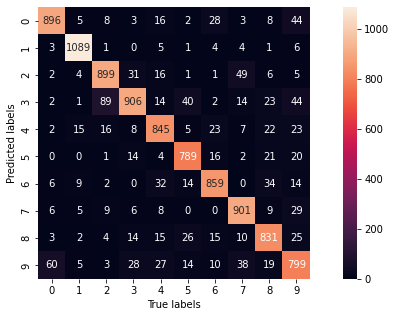

In [20]:
mat_hog = confusion_matrix(test_labels, predictions_hog)

plt.figure(figsize = (12,5))

# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat_hog.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('True labels')
plt.ylabel('Predicted labels');

### Deep Feature Extraction

#### Defining the Deep Neural Architecture (MLP)

Here, the neural network architecture takes 784(28x28) flattened inputs with 4 hidden layers having 512 neurons in each layer. The output layer has 10 outputs for for classifying 10 labels. 

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class Net_pretrained(nn.Module):
    def __init__(self):
        super(Net_pretrained, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 512)   # Input layer with flattend input
        self.fc2 = nn.Linear(512, 512)      # Hidden layer with 512 neurons
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512,512)
        self.fc5 = nn.Linear(512, 10)
        

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28) 
        # add hidden layer, with relu activation function
        x1 = F.relu(self.fc1(x))         
        x2 = F.relu(self.fc2(x1))  
        x3 = F.relu(self.fc3(x2))
        x4 = F.relu(self.fc4(x3))
        output = self.fc5(x4)
        return output,x3      # Returning output of output layer and hidden layer 


#### Inferencing the pretrained model

In [22]:
# Specify a path
PATH = '/content/pretrained_layer4_512n.pt'

# Load
model_pretrained = Net_pretrained()
model_pretrained.load_state_dict(torch.load(PATH))
model_pretrained.eval()

Net_pretrained(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=10, bias=True)
)

#### Specify Loss Function and Optimizer

**Cross Entropy Loss** : Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 

For example, predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

**SGD Optimizer**: Stochastic gradient descent (SGD) is an optimization technique which performs a parameter update for each training example. SGD performs one update at a time and it is therefore usually much faster.

In [23]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model_pretrained.parameters(), lr=0.01)

#### Loading the input 

In [24]:
transform = transforms.ToTensor()
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 1

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Extracting the deep features using pretrained model

In [25]:
def get_features(image):
    model_pretrained.eval()
    _, deep_feature = model_pretrained(image)
    return deep_feature

#### Extracting deep features of training set.

In [26]:
deep_features_train = []
target_train = []
for data,target in train_loader:
    deep_features_train.append(get_features(data[0].squeeze()))
    target_train.append(target)

#### Extracting deep features of test set.

In [27]:
deep_features_test = []
target_test = []
for data,target in test_loader:
    deep_features_test.append(get_features(data[0].squeeze()))
    target_test.append(target)

In [28]:
deep_features_train[0].shape # shape of every row in training test

torch.Size([1, 512])

After generating deep features using pretrained model the deep features are 60000 tensors of size (1, 512)
`torch.cat` function concatenates the given sequence of tensors in the given dimension.So the deep features will now be of size (60000,512) for training set and (10000,512) for test set.

In [29]:
deep_features_train = torch.cat(deep_features_train, 0) 
deep_features_test = torch.cat(deep_features_test, 0) 

In [30]:
deep_features_train.shape  # after applying torch.cat() method

torch.Size([60000, 512])

#### Converting labels to numpy array.

In [31]:
target_train = np.array(target_train)
target_test = np.array(target_test)

#### Training the SVM using deep features.

In [32]:
def train(train_features, train_labels):
    
    # Create an instance for the LinearSVC classifier
    clf = svm.SVC(kernel='linear', random_state=0, max_iter=1000,probability = True)

    # Fitting the data into the model
    clf.fit(train_features, train_labels)

    return clf

#### Get the prediction on the test data

In [33]:
def predict(clf, test_features):
    
    predictions = clf.predict(test_features)

    return predictions

#### Evaluation of accuracies using 'predictions' vs 'ground truth' or test_labels. 

In [34]:
def eval_deep_fe(predictions, test_labels):   
    return accuracy_score(predictions, test_labels)

In [35]:
deep_features_train = deep_features_train.detach().numpy()
deep_features_test = deep_features_test.detach().numpy()

In [36]:
from sklearn.model_selection import train_test_split
deep_features_train,deep_features_valid,y_train,y_valid = train_test_split(deep_features_train,target_train,test_size = 10000)

In [37]:
# Call the functions to train the classifier and get the predictions
# detach().numpy() will convert pytorch tensor to numpy array suitable for training 
trained_deep_features = train(deep_features_train, y_train)   

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


#### Evaluating the training loss

In [38]:
pred_train = trained_deep_features.predict_proba(deep_features_train)
eval_train = log_loss(y_train,pred_train) 
# train_loss = log_loss(y_train, predictions_de_fe_train)
print(f"Loss in Training set is {eval_train}")

Loss in Training set is 0.006053204350175469


#### Evaluating the loss in validation set.

In [39]:
pred_valid = trained_deep_features.predict_proba(deep_features_valid)
eval_valid = log_loss(y_valid,pred_valid) 
# train_loss = log_loss(y_train, predictions_de_fe_train)
print(f"Loss in Validation set is {eval_valid}")

Loss in Validation set is 0.010132644969153835


In [40]:
predictions_deep_features = predict(trained_deep_features, deep_features_test)
# Calculate the accuracy
result = eval_deep_fe(predictions_deep_features, target_test)

In [41]:
# Print the accuracy on Deep features
print('Accuracy score of Deep Learning features is:', result*100)

Accuracy score of Deep Learning features is: 97.97


#### Confusion Matrix for Predicted Label and True Label(Ground Truth).

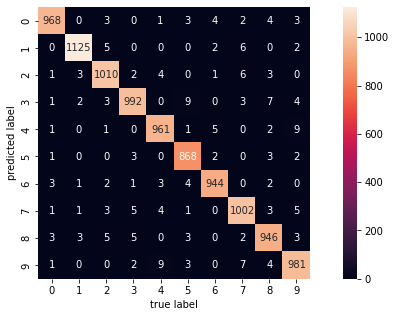

In [42]:
mat_de_fe = confusion_matrix(target_test, predictions_deep_features)

plt.figure(figsize = (12,5))

# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat_de_fe.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Summary 

For Classical feature extraction using HOG and trained with SVM accuracy is 87%.

Using deep features generated using a pretrained neural network model and trained using SVM accuracy is 98%.

### Please answer the questions below to complete the experiment:




In [43]:
#@title Q.1.  Calculate the MSE for below MLP network with inputs (i1, i2) = (0.05, 0.1), weights for layer h1  (w1, w2) = (0.15, 0.2), weights for layer h2 (w3, w4) = (0.25, 0.3), bias b1 = 0.35, b2 = 0.6, weights for o1 are (w5, w6) = (0.40, 0.45), weights for o2 are (w7, w8) = (0.50, 0.55) where o1 and o2 are outputs of the network, given that the activation function is logistic sigmoid for both the layers ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","0.012456","0.298371","0.4687","1.00085"]


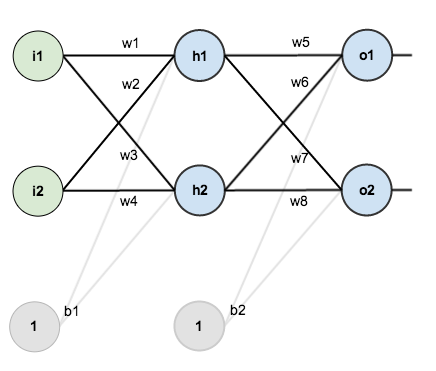

In [44]:
#@title Q.2.Calculate the total gradient magnitude for HOG feature for below marked pixel?
Answer2 = "" #@param ["","20.356","78.58","193.437","150.235"]


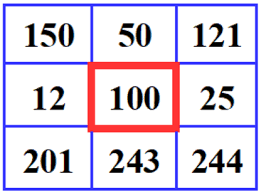

In [45]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [46]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [47]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [48]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [49]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [50]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
